# Refined Stratified Sampling Example 3
Author: Mohit S. Chauhan Date: Jan 25, 2019

In this example, Stratified sampling is used to generate samples from Uniform distribution and sample expnsion is done adaptively using Refined Stratified Sampling.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the STS and RSS class from UQpy.

In [1]:
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import RSS
from UQpy.RunModel import RunModel
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.patches as patches
import numpy as np

Using UQpy STS class to generate samples for two random variables, which are uniformly distributed between 0 and 1.

In [2]:
x = STS(dist_name=['Uniform', 'uniform'], dist_params=[[0, 1], [0, 1]], sts_design=[4, 4])
initial_samples=x.samples.copy()

This plot shows the samples and stratas generated by the STS class.

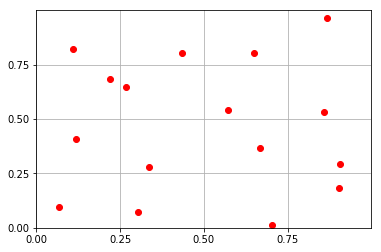

In [3]:
fig2 = plt.figure()
plt.plot(x.samples[:, 0], x.samples[:, 1], 'ro')
ax = fig2.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()

RunModel class is used to estimate the function value at sample points generated using STS class.

In [4]:
rmodel = RunModel(model_script='python_model_function.py')
rmodel.run(samples=x.samples)

This figure shows the actual function defined in python model script.

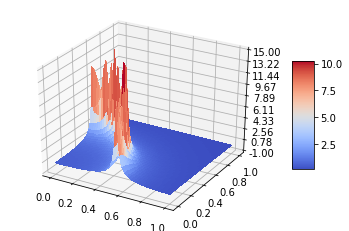

In [5]:
num = 50
x1 = np.linspace(0, 1, num)
x2 = np.linspace(0, 1, num)
x1v, x2v = np.meshgrid(x1, x2)
y_act = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        r1model = RunModel(model_script='python_model_function.py')
        r1model.run(samples=np.array([[x1v[i, j], x2v[i, j]]]))
        y_act[i, j] = r1model.model_output

fig1 = plt.figure()
ax = fig1.gca(projection='3d')
# Plot for estimated values
surf = ax.plot_surface(x1v, x2v, y_act, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-1, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

A RSS class object is initiated by using the STS and RunModel object. In this example, RunModel object is defined nut Krig object is not defined, therefore, RSS class will use linear interpolation and central difference to estimate the gradient.

In [6]:
z = RSS(sample_object=x, run_model_object=rmodel, max_train_size=100)

After initiating the RSS class object, new samples are generated using the RSS.sample method.

In [7]:
z.sample(nsamples=200)

This figure shows the final samples generated using RSS class, where red dots shows the initial samples.

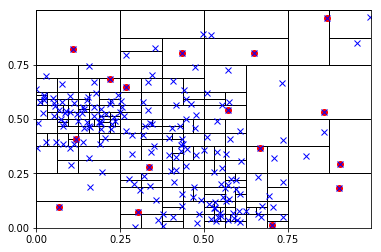

In [8]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.25))
ax.set_yticks(np.arange(0, 1, 0.25))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(initial_samples[:, 0], initial_samples[:, 1], 'ro')
plt.plot(z.sample_object.samplesU01[:, 0], z.sample_object.samplesU01[:, 1], 'bx')
for i in range(z.nsamples):
    rect = patches.Rectangle(z.sample_object.strata.origins[i], z.sample_object.strata.widths[i, 0], z.sample_object.strata.widths[i, 1], linewidth=1,
                             edgecolor='black', facecolor='none')
    ax.add_patch(rect)
plt.show()